In [779]:
import pandas as pd
import matplotlib.pyplot as plt
def setup_plots(version,path,df):
    fig, axs = plt.subplots(3, 1, figsize=(12, 16), sharex=True)
    print(f'version: {version}\n')
    print(df.tail(5)[['step','train_acc', 'train_f1', 'train_loss']])
    # Train Acc
    axs[0].plot(df['step'], df['train_acc'], label='Train Acc', color='blue')
    axs[0].set_ylabel('Train Acc')
    axs[0].set_title('Train Acc vs Step')
    axs[0].legend()
    axs[0].grid(True)

    # Train F1
    axs[1].plot(df['step'], df['train_f1'], label='Train F1', color='green')
    axs[1].set_ylabel('Train F1')
    axs[1].set_title('Train F1 vs Step')
    axs[1].legend()
    axs[1].grid(True)

    # Train Loss
    axs[2].plot(df['step'], df['train_loss'], label='Train Loss', color='red')
    axs[2].set_xlabel('Step')
    axs[2].set_ylabel('Train Loss')
    axs[2].set_title('Train Loss vs Step')
    axs[2].legend()
    axs[2].grid(True)
    for ax in axs:
        ax.set_ylim(0.0, 1.0)
    plt.tight_layout()
    plt.show()
    return fig, axs



version: 195

    step  train_acc  train_f1  train_loss
65  3299    0.78125  0.438596    0.157675
66  3349    0.78125  0.438596    0.160984
67  3399    0.81250  0.448276    0.149895
68  3449    0.87500  0.466667    0.128047
69  3499    0.81250  0.448276    0.150564


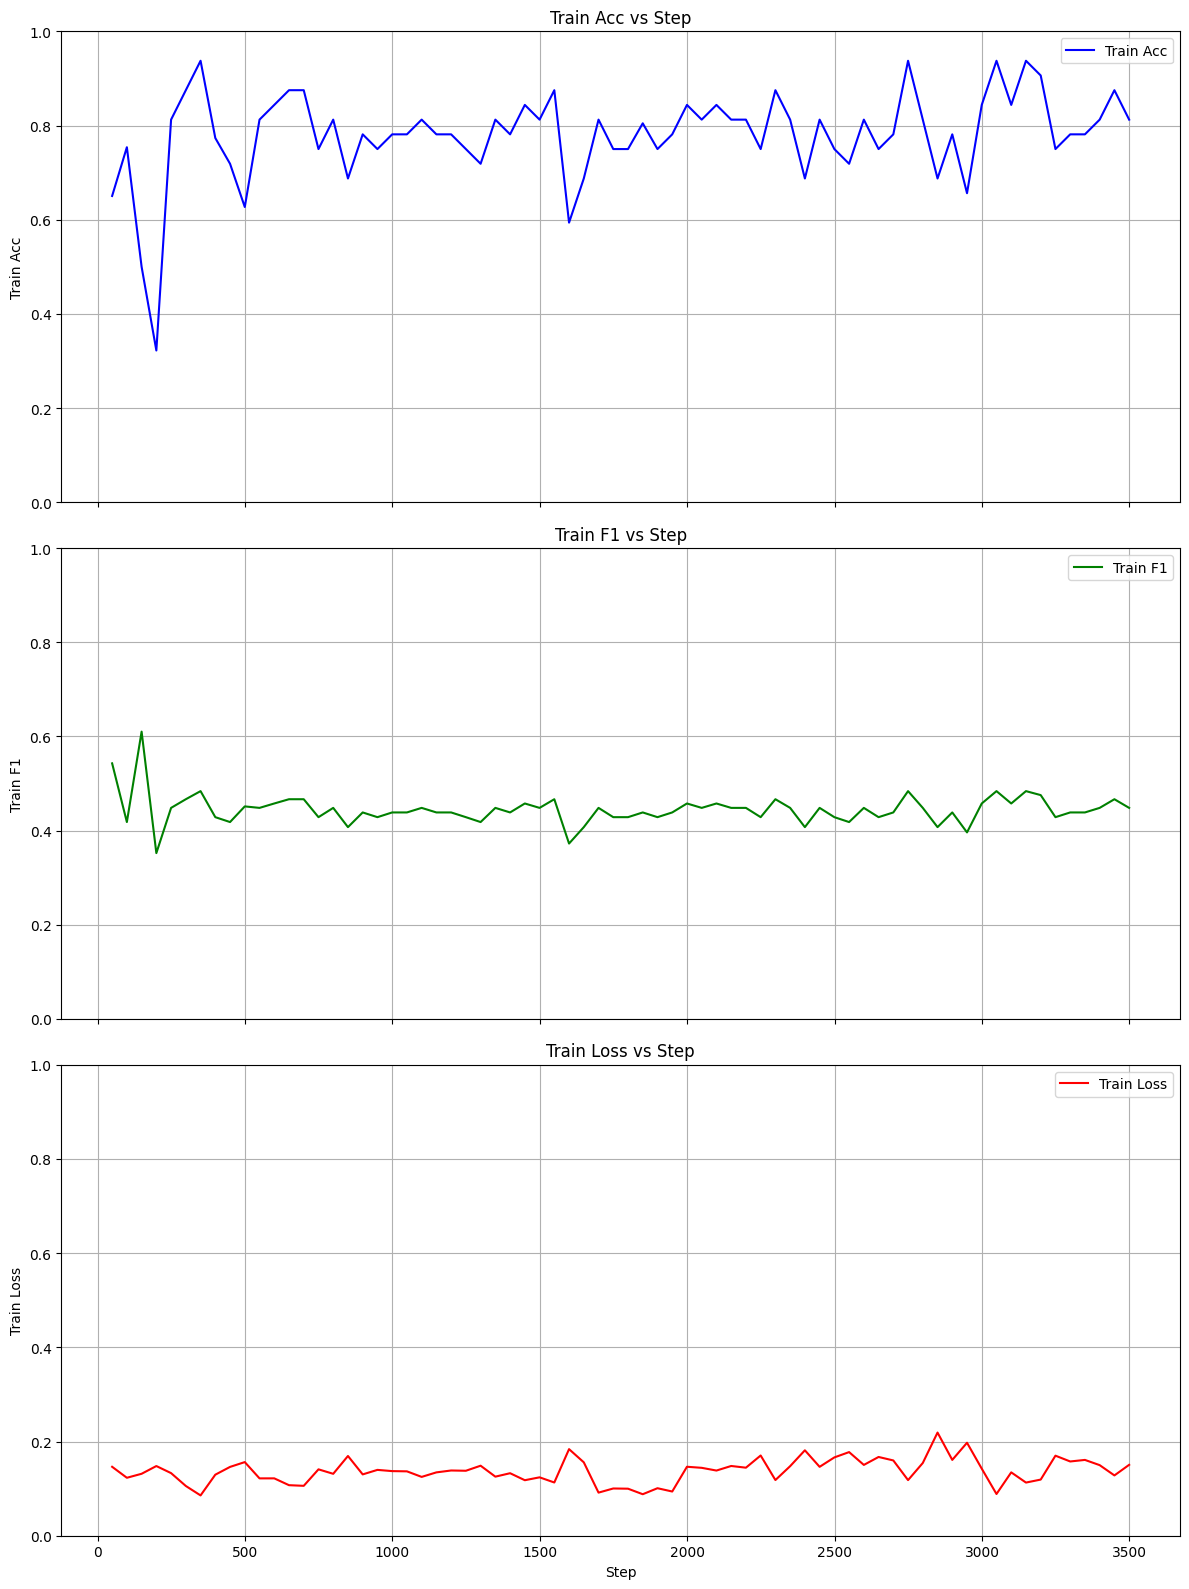

In [780]:
# 172 is one of the best in terms of consistently high accuracy
version = 195; path = f'C:/Files/Development/AI/Transformers/transformer_practice/twitter_sentiment/checkpoints/twitter_sentiment/lightning_logs/version_{version}/metrics.csv'
df = pd.read_csv(path); fig, axs = setup_plots(version=version, path=path, df=df)

In [781]:
acc_avg = df['train_acc'].mean()
f1_avg = df['train_f1'].mean()
loss_avg = df['train_loss'].mean()

print(f'Training Accuracy Average: {acc_avg}')
print(f'Training F1 Average      : {f1_avg}')
print(f'Training Loss Average    : {loss_avg}')

Training Accuracy Average: 0.7807198660714286
Training F1 Average      : 0.44477638261658803
Training Loss Average    : 0.13759263668741498


In [782]:
val_acc_avg = df['val_acc'].mean()
val_f1_avg = df['val_f1'].mean()
val_loss_avg = df['val_loss'].mean()

print(f'Validation Accuracy Average: {val_acc_avg}')
print(f'Validation F1 Average      : {val_f1_avg}')
print(f'Validation Loss Average    : {val_loss_avg}')
df[~pd.isna(df['val_acc'])][['val_acc','val_f1','val_loss']]

KeyError: 'val_acc'

In [ ]:
test_acc_avg = df['test_acc'].mean()
test_f1_avg = df['test_f1'].mean()
test_loss_avg = df['test_loss'].mean()

print(f'Test Accuracy Average: {test_acc_avg}')
print(f'Test F1 Average      : {test_f1_avg}')
print(f'Test Loss Average    : {test_loss_avg}')
df[~pd.isna(df['test_acc'])][['test_acc','test_f1','test_loss']]

Test Accuracy Average: 0.40074244141578674
Test F1 Average      : 0.40053197741508484
Test Loss Average    : 0.19912113249301905


,test_acc,test_f1,test_loss
619,0.434558,0.434170,0.194230
620,0.366926,0.366894,0.204012
